NAME: M Rakesh

# THE SPARKS FOUNDATION

# PREDICTION USING SUPERVISED ML

In this task we will predict the percentage of a student based on the no of study hours they studied. This is a simple linear regression task as it involves just two variables.

# IMPORTING MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# READING THE DATA

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [3]:
#head returns top 5 rows by default
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#head returns last 5 rows by default
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


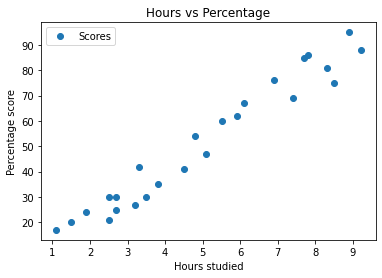

In [9]:
#plotting the relationship between hours studied and percentage score
df.plot( x='Hours' , y='Scores' , style='o' )
plt.title('Hours vs Percentage')  
plt.xlabel('Hours studied')  
plt.ylabel('Percentage score')  
plt.show()

From the graph, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

# PREPARING AND TRAINING THE DATA

In [10]:
x=df.iloc[:, :-1].values 
y=df.iloc[:, 1].values 

In [11]:
from sklearn.model_selection import train_test_split

Here we use train_test_split to divide the data so in this case we assaigned 20%  of data for testing and remaining data for training

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)
print("Training completed")

Training completed


# PLOTTING THE REGRESSION LINE

In [15]:
#coefficient value
model.coef_

array([9.91065648])

In [16]:
#intercept value
model.intercept_

2.018160041434683

In [17]:
line= model.coef_ * x + model.intercept_

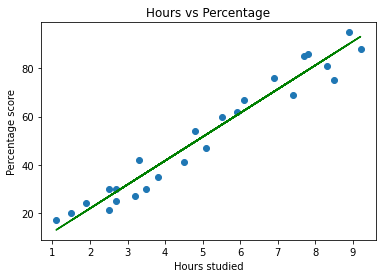

In [18]:
plt.scatter(x, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours studied')  
plt.ylabel('Percentage score')
plt.plot(x, line,color = 'green'); 
plt.show()

In [19]:
#Predicting the Test set results
y_pred = model.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [20]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
df1 = pd.DataFrame({'Actual marks': y_test, 'Predicted marks': y_pred})
df1

,Actual marks,Predicted marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


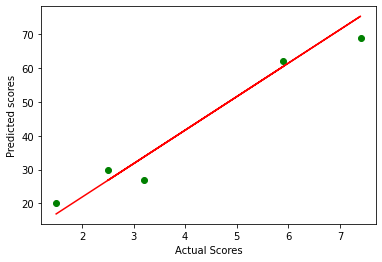

In [22]:
#graph between actual and predicted value
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, y_pred, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted scores")
plt.show()

# MODEL EVALUATION

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


# What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [24]:
# Testing with our own data
hours = [9.25]
pred = model.predict([hours])
print("No of hours = {}".format(hours))
print("predicted score if a student studies for 9.25 hrs/ day is = {}".format(pred[0]))

No of hours = [9.25]
predicted score if a student studies for 9.25 hrs/ day is = 93.69173248737538
